### <b> Exercises </b>

In [107]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint, quad
from scipy.optimize import root_scalar

#### <b> Ex 2.1.1 </b>

In [4]:
# Definindo a função f(x)
def f(x):
    return (1 + x**2) / (1 + np.exp(x))

MUDAR PARA O MÉTODO QUAD DO SCIPY NO CALCULO DO INTEGRAL

In [11]:

# Função para calcular a integral usando o Método do Trapézio
def integrar_trapezio(f, a, b, i):
    # Definindo os pontos igualmente espaçados
    x = np.linspace(a, b, i)
    # Calculando os valores de f(x) nesses pontos
    y = f(x)
    # Calculando o espaçamento entre os pontos
    h = (b - a) / (i - 1)
    # Aplicando o método do trapézio
    integral = (h / 2) * (y[0] + 2 * np.sum(y[1:N-1]) + y[-1])
    return integral


In [ ]:
# Definindo os limites da integral e o número de pontos N
a = -2
b = 1
N =  100 #[10,100, 1000]  # ou 10, 1000, dependendo do valor desejado


In [15]:
resultado = integrar_trapezio(f, a, b, N)
print(resultado)

4.082993839866501


#### <b> Ex 2.1.2 </b>

In [123]:
# Differential Equation
def dydx(x,y):
    return 1-x*y

In [95]:
# Variables

#0 a 5
x_vals_1 = np.linspace(0, 5, 500)

#0 a -2
x_vals_2 = np.linspace(0, -2, 500)

#cond inicial
y0 = 1

n_points = 2*len(x_vals_1)

In [96]:
# Solutions

#0 a 5

sol_1 = odeint(dydx, y0, x_vals_1)

#0 a -2
sol_2 = odeint(dydx, y0, x_vals_2)

In [97]:
# Plot solution function
def plot_sol(x_vals_1, x_vals_2, sol1, sol2, n_points):
    # Criando o plot para ambos os intervalos
    plt.figure(figsize=(10, 6))

    # Plot para o intervalo 0 a 5
    plt.plot(x_vals_1, sol_1, marker='o', label="y(x) [0, 5]", color='blue')

    # Plot para o intervalo 0 a -2
    plt.plot(x_vals_2, sol_2, marker='o', label="y(x) [0, -2]", color='blue')

    # Configurando o gráfico
    plt.title(f"Solução da EDO dy/dx = 1 - xy nos intervalos [0, 5] e [0, -2] c/{n_points} pontos")
    plt.xlabel("x")
    plt.ylabel("y(x)")
    plt.axhline(0, color='black',linewidth=0.5, ls='--')  # Linha horizontal no zero
    plt.axvline(0, color='black',linewidth=0.5, ls='--')  # Linha vertical no zero
    plt.legend()
    plt.grid(True)
    plt.show()

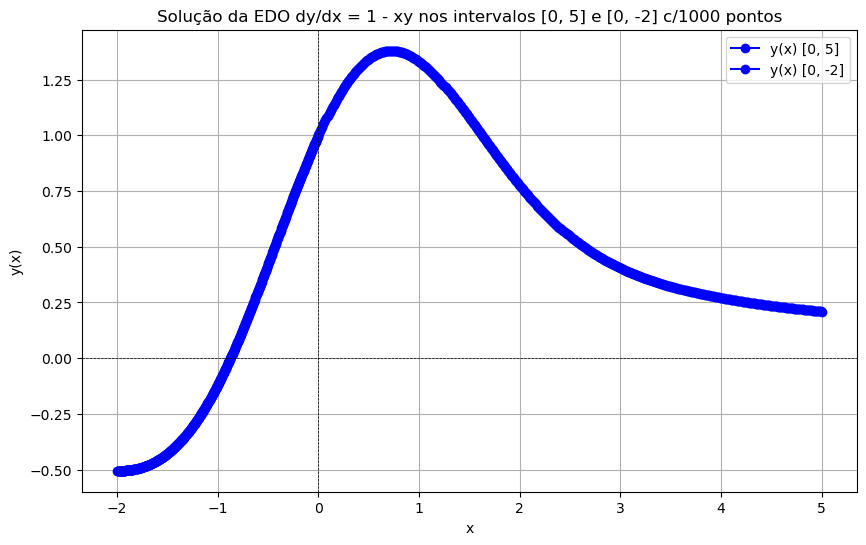

In [98]:
plot_sol(x_vals_1, x_vals_2, sol_1, sol_2, n_points)

#### <b> Ex 2.1.3 </b>

In [113]:
# Função f(x)
def fc(x,c):
    return (1 + c*x**2) / (1 + np.exp(c*x))


In [114]:
#Função para calcular o integral da função fc(x,c)
def I(c):
    integral, _ = quad(fc, -2, 2, args=(c,))
    return integral

In [115]:
def zero_function(c):
    return I(c)

In [121]:
def find_root(zero_func, bracket, method='bisect'):
    result = root_scalar(zero_func, bracket=bracket, method=method)
    return result

In [122]:
# Calculate root
bracket = [-10,10]
find_root(zero_function, bracket)

      converged: True
           flag: converged
 function_calls: 46
     iterations: 44
           root: -0.7499999999993179

#### <b> Ex 2.1.4 </b>

In [124]:
# Sistema de Eqs. Diferenciais
def system(t, y):
    y1,y2 = y
    dydt = [t**2 - y1 * y2, 1 + y1 + (y2 / (t + 3))]
    return dydt

In [125]:
#Condições iniciais
y0 = [0,1] # y1(0) = 0, y2(0) = 1

# Intervalo para t
t